In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Chosing Glucose , BMI and age as the predictors

# Checking Outliers

array([[<AxesSubplot:title={'center':'Glucose'}>]], dtype=object)

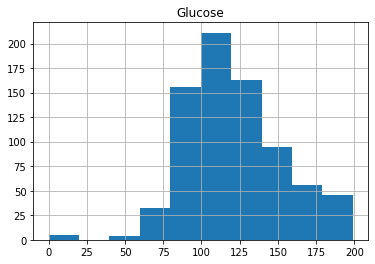

In [6]:
df.hist(column='Glucose',bins=10)

array([[<AxesSubplot:title={'center':'BMI'}>]], dtype=object)

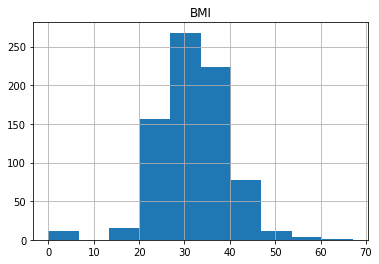

In [7]:
df.hist(column='BMI',bins=10)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

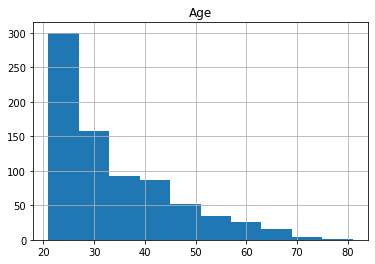

In [8]:
df.hist(column='Age',bins=10)

No such outliers detected in the predictors variables

In [9]:
X = df[['Glucose','BMI','Age']]
y = df['Outcome']

In [10]:
X.shape

(768, 3)

In [11]:
y.shape

(768,)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler   
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  

In [13]:
std_x= StandardScaler()    
x_train= std_x.fit_transform(x_train)    
x_test= std_x.transform(x_test) 

# Logistic Regression

In [14]:
lrg_c= LogisticRegression(random_state=0)  
lrg_c.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [15]:
lrg_c.score(x_test, y_test)

0.7760416666666666

In [16]:
y_pred= lrg_c.predict(x_test) 
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

# Model Evaluation

In [17]:
from sklearn.metrics import accuracy_score
print('Classification Model accuracy score is : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Classification Model accuracy score is : 0.7760


In [18]:
s = cross_val_score(lrg_c, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores are:{}'.format(s))

Cross-validation scores are:[0.76724138 0.82608696 0.76521739 0.70434783 0.8       ]


In [57]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

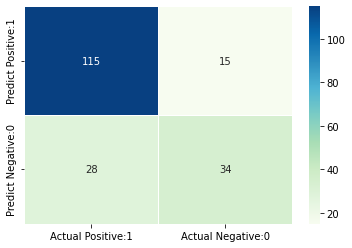

In [58]:
confusion_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(confusion_matrix, annot=True, fmt='d',linewidths=1.0, cmap='GnBu')

In [64]:
print("The Logisitic Regression Model Performance is\n\n",classification_report(y_test, y_pred))

The Logisitic Regression Model Performance is

               precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.69      0.55      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



# Decision Tree Classifier

In [37]:
'''p ~ Predictor variables
t ~ target variable.'''

p = df[['Glucose','BMI']]
t = df['Outcome']

In [38]:
P_train, P_test, t_train, t_test = train_test_split(p, t, train_size=0.70,random_state=0)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
d_tree=DecisionTreeClassifier()

In [26]:
d_tree.fit(P_train, t_train)

DecisionTreeClassifier()

In [27]:
d_tree.score(P_test, t_test)

0.7229437229437229

In [39]:
t_pred=d_tree.predict(P_test)

In [52]:
t_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

# Model Evaluation

In [30]:
print('Classification Model accuracy score is : {0:0.4f}'. format(accuracy_score(t_test, t_pred)))

Classification Model accuracy score is : 0.7229


In [34]:
cross_validation_score = cross_val_score(d_tree, P_train, t_train, cv = 5, scoring='accuracy')
print('Cross-validation scores are:{}'.format(cross_validation_score))

Cross-validation scores are:[0.62962963 0.7037037  0.68224299 0.70093458 0.69158879]


In [65]:
print("Decision Tree Classifier Performance\n\n",classification_report(t_test,t_pred))

Decision Tree Classifier Performance

               precision    recall  f1-score   support

           0       0.80      0.80      0.80       157
           1       0.57      0.57      0.57        74

    accuracy                           0.72       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.72      0.72      0.72       231



In [56]:
cm1= confusion_matrix(t_test,t_pred)

<AxesSubplot:>

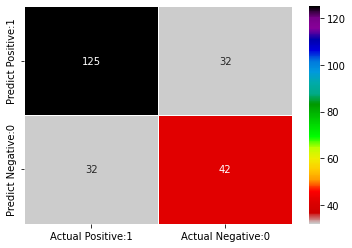

In [60]:
confusion_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(confusion_matrix, annot=True, fmt='d',linewidths=1.0, cmap='nipy_spectral_r')